#Задание


Имеется выборка новостных сообщений Reuters https://www.kaggle.com/boldy717/reutersnltk состоящая их Id статьи, класса (тематики) статьи и самого текста статьи. Тематик у каждой статьи может быть несколько.
Необходимо: 

1. Проанализировать выборку и провести ее предварительную обработку:
- a. построить гистограммы распределения по классам.
- b. разбить выборку на отдельные слова и определить частоту встречаемости каждого слова в выборке. По результатам построить график зависимости слова от частоты по убыванию частоты.
- c.	Провести нормализацию (или лемматизацию, или стемминг) слов и повторить расчеты п. b)
- d.	Удалить из выборки слова, которые встречаются менее 3 раз.
- e.	Для каждого документа оставить единственный класс, который встречается в выборке чаще всего (например, если для некоторого документа определено 2 класса: «earn» и «grain», при этом, в класс «earn» входит 3500 документов, а в «grain» 780, то для данного документа оставить класс «earn»). 
- f.	Еще раз построить гистограммы распределения по классам, проанализировать изменения


2.	Выбрать 7 наиболее крупных классов, остальные – удалить. Для каждого из оставшихся классов выявить по 20 наиболее часто встречаемых слов, отобразить их в виде таблицы или «облака слов». 

3.	Визуализировать получившуюся выборку в двух- (или трех-) мерном пространстве любым известным способом (метод главных компонент, t-sne,…), чтобы документы разных классов отображались на графике разными цветами.

4.	Обработанную выборку разбить на обучающую и тестовую, настроить и обучить несколько классификаторов (на ваш выбор) на обучающей выборке, а на тестовой проанализировать получившуюся полноту и точность. 


# Выполнение

## 1) Анализ и предобработка выборки


In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Читаем данные из файла
data = pd.read_excel('reutersNLTK.xlsx')

In [ ]:
# конвертируем строку с категориями в список
data['categories'] = data['categories'].apply(lambda x: ast.literal_eval(x))

In [ ]:
categ =[]
for c in data['categories']:
    categ += c
categ = pd.Index(categ).value_counts()

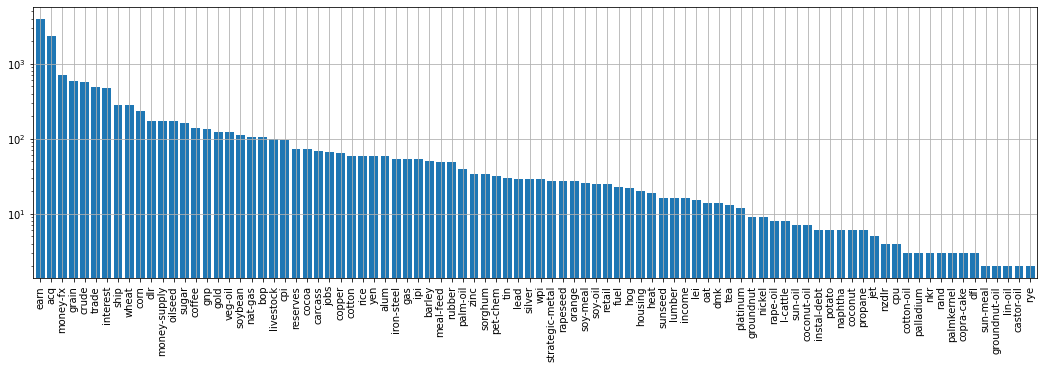

In [ ]:
# график распределения статей по категориям
categ.plot(kind = "bar", grid=True, logy = True,figsize =(18,5),rot = 90,width =0.8)

In [ ]:
import re

In [ ]:
# считаем количество вхождений каждого слова в выборку
wor = []
for w in data['text']:
    wor +=re.findall(r'[a-z]{2,}', w.lower())
words = pd.Index(wor).value_counts()

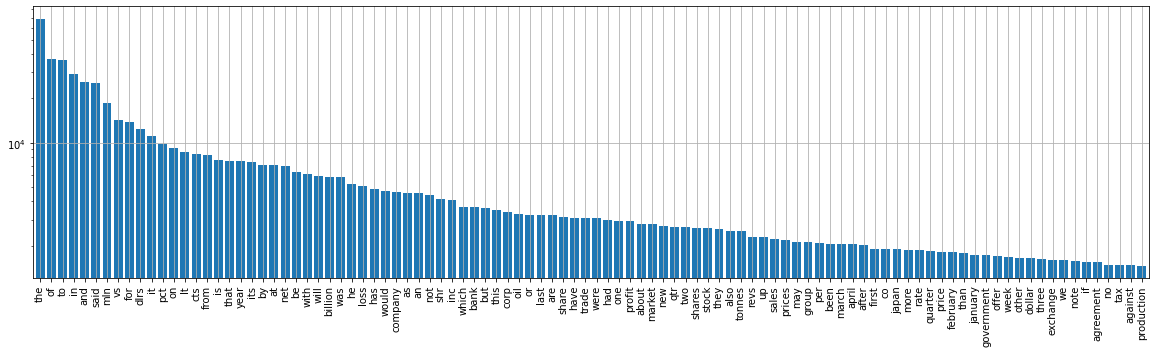

In [ ]:
# график количества вхождений слов в выборке
words.head(100).plot(kind = "bar", grid=True, logy = True,figsize =(20,5),rot = 90,width =0.8)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
# нормализация слов в выборке
data['words']=''
stop_words = set(stopwords.words("english"))
for rec in data.values:
    rec[3] = nltk.word_tokenize(re.sub(r'\d',' ',rec[2].lower()))
    rec[3] = [w for w in rec[3] if not w in stop_words and len(re.findall(r'\W',w))==0 and len(w)>1]
    

In [ ]:
lemmatizer = WordNetLemmatizer()
for rec in data.values:
    rec[3] = [lemmatizer.lemmatize(w) for w in rec[3]]
    rec[3] = [w for w in rec[3] if not w in stop_words and len(w)>1]

In [ ]:
wordlist = []
for w in data['words']:
    wordlist +=w
words = pd.Index(wordlist).value_counts()

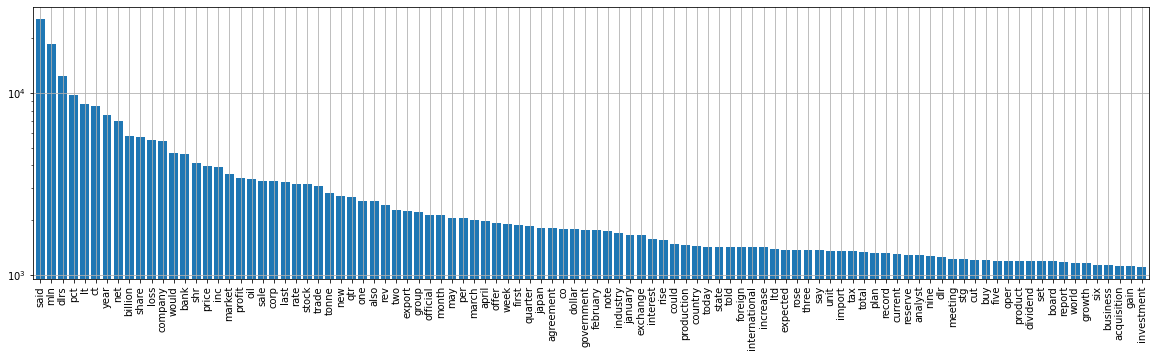

In [ ]:
# график количества вхождений слов в нормализованной выборке
words.head(100).plot(kind = "bar", grid=True, logy = True,figsize =(20,5),rot = 90,width =0.8)

In [ ]:
# удалили все слова, встречающиеся в выборке менее 3 раз
for rec in data.values:
    rec[3] = [w for w in rec[3] if words[w]>=3]

In [ ]:
# оставляем одну категорию каждой статье
for rec in data.values:
    categ_weights = dict(zip(rec[1],[categ[c] for c in rec[1]]))
    rec[1] = max(categ_weights, key=categ_weights.get)
data

,ids,categories,text,words
0,test/14826,trade,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,"[asian, exporter, fear, damage, rift, mounting..."
1,test/14828,grain,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,"[china, daily, say, eat, pct, grain, stock, su..."
2,test/14829,crude,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[japan, revise, energy, demand, downwards, min..."
3,test/14832,grain,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,"[thai, trade, deficit, widens, first, quarter,..."
4,test/14833,veg-oil,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,"[indonesia, see, cpo, price, rising, sharply, ..."
...,...,...,...,...
10783,training/999,money-fx,U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...,"[money, market, shortage, forecast, revised, b..."
10784,training/9992,earn,KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY\n Q...,"[inc, lt, set, quarterly, qtly, div, ct, ct, p..."
10785,training/9993,earn,TECHNITROL INC &lt;TNL> SETS QUARTERLY\n Qtly...,"[inc, lt, set, quarterly, qtly, div, ct, ct, p..."
10786,training/9994,earn,NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...,"[nationwide, cellular, service, inc, lt, th, q..."


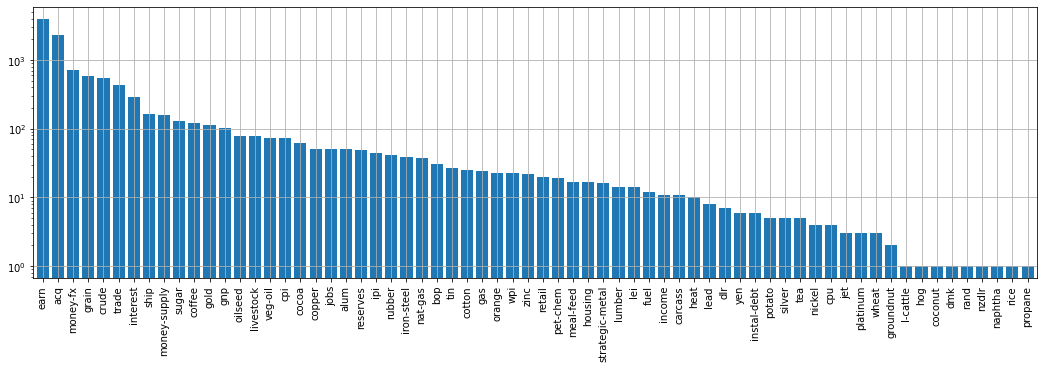

In [ ]:
# рассчитываем оставшиеся категории и строим график
ncateg = data['categories'].value_counts()
ncateg.plot(kind = "bar", grid=True, logy = True,figsize =(18,5),rot = 90,width =0.8)

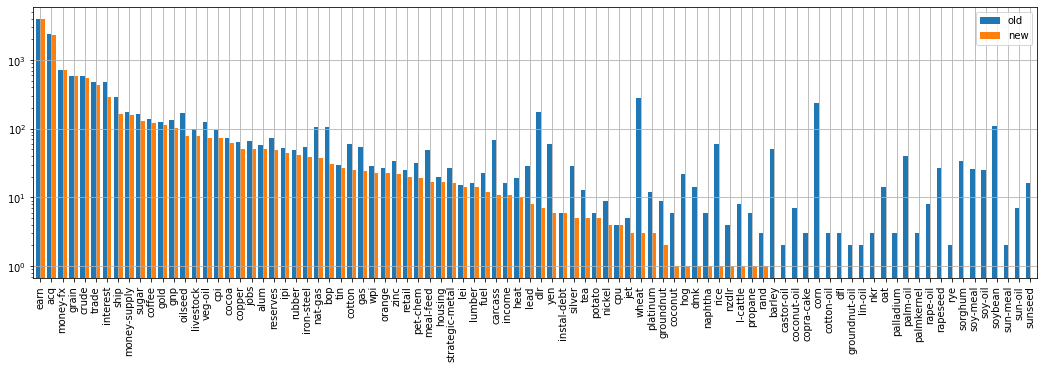

In [ ]:
# посмотрим как изменилось расспределение статей по категориям
catdf = pd.DataFrame({'old': categ,'new':ncateg})
catdf.sort_values(by='new',ascending=False).plot(kind = "bar", grid=True, logy = True,figsize =(18,5),rot = 90,width =0.8)
# лидеры остались на своих местах.
# категории, которые не вошли в скорректированную выборку можно считать побочными
# эти категории встречаются только в паре с какой-нибудь из более популярных категорий

## 2) Отбор наибольших классов

In [ ]:
from wordcloud import WordCloud

In [ ]:
# выделяем 7 наибольших классов
major_categ = list(ncateg.head(7).index.array)
major_categ

['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest']

In [ ]:
# отбираем статьи наибольших классов
s = 'False'
for c in major_categ:
    s+=f" | (data['categories'] == '{c}')"
major_data = data.loc[eval(s)].set_index('ids')

In [ ]:
# подготовим датафрейм для классов
classdf= pd.DataFrame(major_categ, columns =['ids'])
classdf.set_index('ids',inplace = True)
classdf['words']=''
classdf['cmn_words']=''

100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


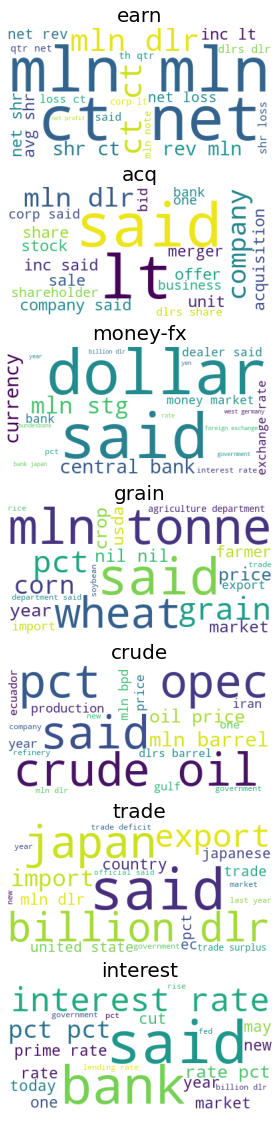

In [ ]:
# строим облака слов по классам
fig, axs = plt.subplots(7,figsize=(30, 20))
for i in tqdm(range(0,len(classdf))):
    wlist =[]
    for row in major_data.loc[major_data['categories']==classdf.index[i]].iterrows():
        wlist +=row[1]['words']
    classdf['words'][i] = ' '.join(wlist)
    classdf['cmn_words'][i] = pd.Index(wlist).value_counts().head(20)
    wc = WordCloud(background_color="white",repeat=True,max_words=20).generate(classdf['words'][i])
    axs[i].imshow(wc)
    axs[i].axis("off")
    axs[i].set_title(classdf.index[i],size = 20)

In [ ]:
# 20 наиболее часто встречаемых слов для каждого класса 
pd.DataFrame(classdf['cmn_words'])

,cmn_words
ids,
earn,mln 11504 ct 8120 net ...
acq,said 7036 lt 3865 share ...
money-fx,said 2543 bank 1588 dollar ...
grain,said 1789 tonne 1303 mln ...
crude,said 2145 oil 2023 mln ...
trade,said 1794 trade 1784 billion ...
interest,rate 1118 pct 946 said ...


## 3) Визуализация выборки


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
#Добавим столбец отстемленного текста
major_data['stem_text']=''
for row in major_data.iterrows():
  text = ''
  for word in row[1]['words']:
    text+=word+" ";
  row[1]['stem_text'] = text

In [ ]:
# преобразуем выборку в матрицу и понизим ее размерность с помощью МГК
vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(major_data['stem_text']).todense()
pca = PCA(n_components=2).fit_transform(doc_vec)

In [ ]:
pcadf = pd.DataFrame(pca,columns = ['pca_comp_1','pca_comp_2'],index = major_data.index)
major_data = pd.concat([major_data,pcadf],axis=1, join="inner")

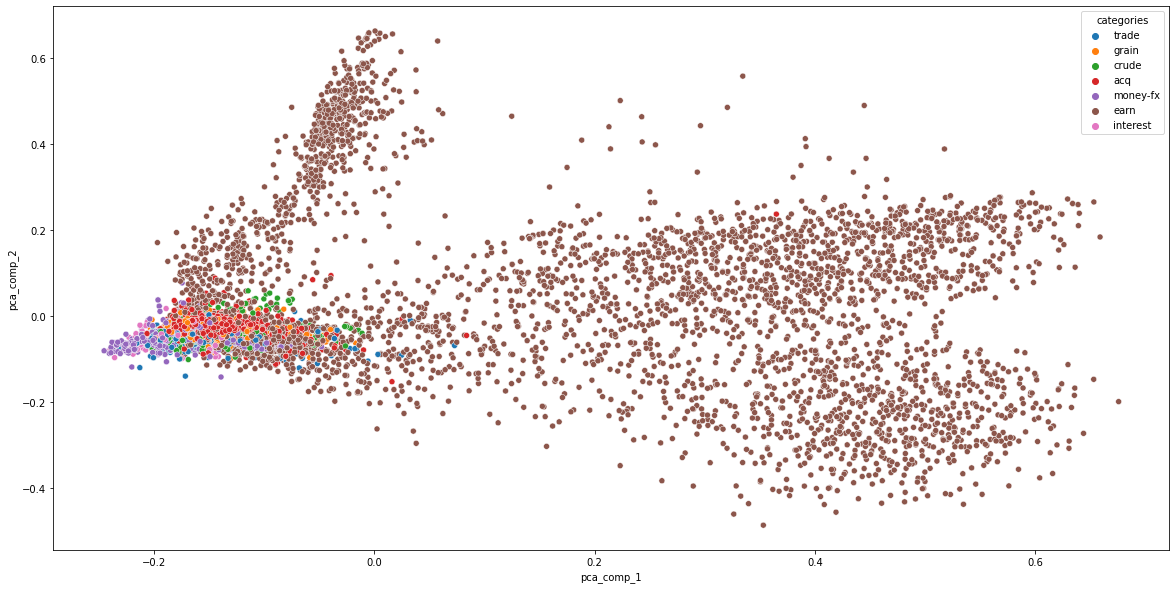

In [ ]:
# визуализация распределения статей
fig, ax = plt.subplots(figsize=[20,10])
sns.scatterplot(ax = ax,data = major_data,x = 'pca_comp_1',y='pca_comp_2',hue = 'categories')

## 4) Обучение классификаторов


In [ ]:
# разбиваем выборку на тестовую и обучающую
sep_idx = [major_data.index.tolist().index(l) for l in major_data.index.tolist() if l.startswith('test')][-1]+1
test_data  = major_data.head(sep_idx)
train_data = major_data.tail(major_data.shape[0]-sep_idx)

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# инициализируем модели
logreg = make_pipeline(TfidfVectorizer(),LogisticRegression())
knn = make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors = 150))
dtree = make_pipeline(TfidfVectorizer(),DecisionTreeClassifier())
svc = make_pipeline(TfidfVectorizer(),SVC())

In [ ]:
clfs = {'logreg':logreg,'knn':knn,'dtree':dtree,'svc':svc}

In [ ]:
# обучаем модели
for clf in tqdm(clfs.values()):
    clf.fit(train_data.stem_text.to_list(),train_data.categories.to_list())

100%|██████████| 4/4 [00:33<00:00,  8.27s/it]


In [ ]:
# вычисляем значения полноты и точности для полученных моделей
metricsdf = pd.DataFrame(columns = ['precision','recall'],index = clfs.keys())
for clf in tqdm(clfs.items()):
    pred = clf[1].predict(test_data.stem_text)
    metricsdf.loc[clf[0],'recall'] = recall_score(test_data.categories,pred,average='weighted')
    metricsdf.loc[clf[0],'precision'] = precision_score(test_data.categories,pred,average='weighted')
metricsdf

100%|██████████| 4/4 [00:09<00:00,  2.36s/it]


,precision,recall
logreg,0.952248,0.950839
knn,0.871408,0.852918
dtree,0.895931,0.896483
svc,0.94822,0.946443
